# Introduction to PyTorch

This tutorial shows the basics of PyTorch library.

We design simple Neural Networks for classification task on MNIST dataset.

Necessary knowledge you can find in PyTorch documentation:

https://pytorch.org/docs/stable/index.html

and tutorials:

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [1]:
!mkdir data

1. PyTorch is based on tensor operations.
Please create tensors in the following ways:
- directly with python list
- from `numpy`
- with random values (initialize generator with your academic id / student number from USOS system)
- linear space in range from -5 to 15 and number of elements.
- 3 tensors with indices of each element of grid for dimensions: 1, 2, 3 (without 0-th - basically is a batch dim)

For all cases use `shape = (1, 3, 28, 28)`.

For display use `print` function.

In [2]:
import torch
import numpy as np

shape = (1, 3, 28, 28)
t = torch.sensor([23.4, 5675.1])
a = np.empty(shape, dtype=int)
t = torch.from_numpy(a)
torch.random.manuel_seed(82402)
t = torch.rand(shape)
dim_1 = torch.arange(0,shape[1])
dim_2 = torch.arange(0,shape[2])
dim_3 = torch.arange(0,shape[3])
t1,t2,t3 = torch.meshgrid(dim_1, dim_2, dim_3)
t = ...

AttributeError: module 'torch' has no attribute 'sensor'

2. PyTorch allow for applying GPU for computations.
Check is gpu (CUDA) is available, then use it as `device`, else use `'cpu'`.

In [4]:
device = ...

3. To train a networks we need a dataset. 

Please download `MINIST` dataset with `torchvision.dataset`.

For any kind of ML task, validation or testing is required.

So, create train and test datasets.

For train dataset apply also augmentation transforms, crop, translation and rotation.

You can try to apply different transforms.

For both apply ToTensor.

Next, pack datasets into `DataLoader`s with batch size of 64.
Use variables with names: `train_loader` and `test_loader`. 

Next display sizes of datasets, shapes of elements and display few images and their labels.

Shape for train data is torch.Size([60000, 28, 28])
Shape for test data is torch.Size([10000, 28, 28])
Shapes of elements for train data is torch.uint8
Shapes of elemenst for test data is torch.uint8


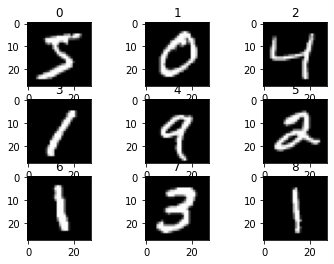

In [38]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST
MNIST(".", download=True)

train = datasets.MNIST(root = "data",  train = True, transform=ToTensor())
test= datasets.MNIST(root = "data",  train = False, transform=ToTensor())

train_loader = DataLoader(train, batch_size = 64, shuffle=True)
test_loader = DataLoader(test, batch_size = 64, shuffle=True)

combine = [train.data, test.data]


print(f"Shape for train data is {combine[0].shape}")
print(f"Shape for test data is {combine[1].shape}")

print(f"Shapes of elements for train data is {combine[0].dtype}")
print(f"Shapes of elemenst for test data is {combine[1].dtype}")


from matplotlib import pyplot
for i in range(9):  
    plt.subplot(3, 3, i+1)
    plt.title(i)
    plt.imshow(train.data[i], cmap=pyplot.get_cmap('gray'))
plt.show()


4. `*`Additionally, you can prepare analysis of datasets. 

E.g. statistics like mean and variance of all elements, for each label.

Analysis can allow you for designing better network architecture.   

In [67]:
for i, data in enumerate(combine):
    print("Train DATA") if i == 0 else print("\nTest DATA")
    print(f"Mean of the data is {torch.mean(data * 1.0)}")

Train DATA
Mean of the data is 33.31842041015625

Test DATA
Mean of the data is 33.79122543334961


5. When we have datasets, so we can create model for classification task.

Please, define class `MLP` as Multi Layer Perceptron 

with two hidden fully connected layers with bias.

Class must inherits from `torch.nn.Module`.

Apply following configuration:

- first with 512 neurons,
- second with 512 neurons,
- output layer adjust to size of classification problem.

For `__init__` method add parameters: input_shape and output_size.

Don't forget about nonlinearities! 

For hidden layers you can use `ReLU` module from `torch.nn`.

For output apply softmax function.

Network layer-by-layer processing define in `forward` method with argument as a network 

input tensor - batch of images with shape (batch_size, channels, height, width).
(channels = 1, for gray scale images)

Instantiate model as `net` object.


In [ ]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_shape, output_size, n_features = "3*28*28", n_hidden=512, num_classes=10) -> None:
        super().__init__()

        self.fc1 = nn.ReLU(n_features, n_hidden)
        self.fc2 = nn.ReLU(n_hidden, n_hidden)
        self.fc3 = nn.ReLU(n_hidden, num_classes)
        
    def forward(sefl, x: torch.Tensor) -> torch.Tensor:
        y = rearrange(x)

        pass


net = ...

6. To train network we need to know 'how good or bad' results it gives.
Please, instantiate `torch.nn.CrossEntropyLoss` as `loss_fcn`.

7. To score network define accuracy metric.
For network output you need to decide what is the final network answer.
(`argmax`).

`torch.no_grad()` prevents gradient requirement for computations inside method.

In [24]:
from abc import ABC, abstractmethod
from typing import Any


class BaseMetic(ABC):

    @abstractmethod
    def __call__(self, y_pred, y_ref) -> Any:
        raise NotImplementedError()    
    
    
class AccuracyMetic(BaseMetic):

    def __init__(self) -> None:
        pass
    
    @torch.no_grad()
    def __call__(self, y_pred: torch.Tensor, y_ref: torch.Tensor) -> torch.Tensor:
        """
        :param y_pred: tensor of shape (batch_size, num_of_classes) type float
        :param y_ref: tensor with shape (batch_size,) and type Long
        :return: scalar tensor with accuracy metric for batch
        """
        # scalar value
        score: torch.Tensor = ...
        
        return score


metric = AccuracyMetic()

8. To change network parameters, we need optimizers object.
Instantiate `torch.optim.SGD` (with `net`work parameters) as `optimizer`.
Use learning rate = 0.001

In [17]:
optimizer = ...

9. Now define training / testing function:

In [ ]:
from typing import Tuple
import tqdm


def train(model, 
          data_generator, 
          criterion, 
          metric: BaseMetic,
          mode: str = 'test',
          optimizer: torch.optim.Optimizer = None, 
          update_period: int = None,
          device = torch.device('cpu')) -> Tuple[torch.nn.Module, float, float]:
    
    # change model mode to train or test
    if mode == 'train':
        ...
        
    elif mode == 'test':
        ...
        
    else:
        raise RuntimeError("Unsupported mode.")

    # move model to device
    
    # reset model parameters' gradients with optimizer
    if mode == 'train':
        ...
    
    total_loss = 0.0
    total_accuracy = 0.0
    samples_num = 0
    
    for i, (X, y) in tqdm.tqdm(enumerate(data_generator)):
        # convert tensors to device
        ...
        
        # depending on mode use or not torch.no_grad() as 'with' block
        ...
        
        # process by network
        y_pred = ...
        
        # calculate loss
        loss = ...
        
        # designate gradient based on loss
        ...
        
        if mode == 'train' and (i+1) % update_period:
            # update parameters with optimizer
            ...
        
        # calculate accuracy
        accuracy = ...
        
        total_loss += loss.item() * y_pred.shape[0]
        total_accuracy += accuracy.item() * y_pred.shape[0]
        samples_num += y_pred.shape[0]
    
    if samples_num == 0:
        return model, 0.0, 0.0
    
    return model, total_loss / samples_num, total_accuracy / samples_num

10. Prepare training loop (over epochs) function:
- adjust max number of epochs to achieve satisfactory results.
- `**` additionally, implement auto-detection of bias-variance tradeoff point, to break further training.
- `***` additionally, use learning rate scheduler.
- for each epoch collect losses and accuracies for both datasets.

In [ ]:
...

11. Display training history. 

12. Save model and optimizer states to files.

Use method `state_dict` and function `torch.save`.

In [ ]:
...

13. Create new network with the same architecture and initialize it with saved weights.

`torch.load`, `load_state_dict`.

In [ ]:
net2 = ...
...

14. Define your own model and train it.

Try achieve better results.

You can use different parameters, layers e.g.:
- conv2d
- maxpooling2d
- batch norm 2d
- and more...

Save weights to file.

In [ ]:
...

15. You can leave a feedback, if you want :)

16. Send your results(notebook+weights) in a *.zip file by e-mail 

or (preferred) send link to your's github (public) repository with your results.